In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import requests
from sklearn.impute import SimpleImputer
from fake_useragent import UserAgent
from pandas_profiling.profile_report import ProfileReport as pp

In [2]:
superseis = "https://superseis.com.py/category/278-bebidas-no-alcoholicas-energizantes.aspx"
casarica = "https://www.casarica.com.py/catalogo/bebidas-energizantes-c49"
salemma = "https://www.salemmaonline.com.py/bebidas-s-alcohol/energizantes"
stock = "https://www.stock.com.py/category/278-bebidas-no-alcoholicas-energizantes.aspx"

In [3]:
competitors_energizante = []
brands = []
prices = []

In [4]:
# Superseis
class_item_box = "item-box"
class_brand = "product-brand"
class_price = "price-label"

headers={'user-agent':UserAgent().random}
url = superseis
soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
for el in soup.find_all("div",attrs={"class":class_item_box}):
    brand = re.sub("\n","",el.find("div",attrs={"class":class_brand}).text)
    price = int(el.find("span",attrs={"class":class_price}).text.replace(".",""))
    print("Brand: ",brand,"Price: ",price)         
    brands.append(brand)
    prices.append(price)
         

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/usr/lib/python3.10/site-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/usr/lib/python3.10/site-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


Brand:   Price:  13000
Brand:   Price:  7000
Brand:   Price:  7000
Brand:   Price:  7000
Brand:  TNT Price:  7400
Brand:   Price:  7950
Brand:   Price:  22550
Brand:   Price:  13000
Brand:   Price:  11500
Brand:   Price:  6400
Brand:   Price:  13000
Brand:   Price:  8800
Brand:  RED BULL Price:  12000
Brand:   Price:  13000
Brand:  RED BULL Price:  48000


In [5]:
#Casarica
class_container = "product"
class_brand = "ecommercepro-loop-product__title"
class_price = "price"
headers={'user-agent':UserAgent().random}
url = casarica+"?q="+"energizante"
soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
for el in soup.find_all("div",attrs={"class":class_container}):
    brand = re.sub(r"BEBIDA\sENERGIZANTE\s|ENERGIZANTE\s","",re.search(r"BEBIDA\sENERGIZANTE\s\w{1,10}|ENERGIZANTE\s\w{1,10}",el.find("h2",attrs={"class":class_brand}).text).group())
    price = int(re.search(r"\d{1,3}.\d{3}",el.find("span",attrs={"class":class_price}).text).group().replace(".",""))
    print("Brand: ",brand,"Price: ",price) 
    brands.append(brand)
    prices.append(price)
    
    

Brand:  DARK Price:  15000
Brand:  DARK Price:  6500
Brand:  MONSTER Price:  13000
Brand:  MONSTER Price:  13000
Brand:  RED Price:  12000
Brand:  SHOT Price:  9500
Brand:  SHOT Price:  16200
Brand:  FLYING Price:  8000
Brand:  FLYING Price:  12250


In [6]:
#Salemma
class_container = "col-lg-3 col-md-4 col-sm-4 col-6 pdivp div-product-list"
class_price = "pprice"
class_brand = "ptitle"
headers={'user-agent':UserAgent().random}
url = salemma
soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
for el in soup.find_all("div",attrs={"class":class_container}):
    brand = el.find("h6",attrs={"class":class_brand}).text.strip()
    price =int(re.sub("Gs. ","",el.find("h6",attrs={"class":class_price}).text.strip()).replace(".",""))
    print("Brand: ",brand,"Price: ",price) 
    brands.append(brand)
    prices.append(price)
    

Brand:  BALY Price:  7450
Brand:  BALY Price:  12550
Brand:  BALY Price:  21150
Brand:  BALY Price:  7450
Brand:  BALY Price:  13450
Brand:  DARK DOG Price:  15000
Brand:  DARK DOG Price:  13000
Brand:  DARK DOG Price:  24000
Brand:  DARK DOG Price:  11500
Brand:  DARK DOG Price:  40000
Brand:  ENERGY Price:  9000
Brand:  ENERGY Price:  15300
Brand:  MONSTER Price:  13000
Brand:  MONSTER Price:  13000
Brand:  OKF Price:  6700
Brand:  RED BULL Price:  12000
Brand:  SELTZ Price:  5900
Brand:  SELTZ Price:  15500
Brand:  SPEED LATA Price:  10300
Brand:  VULCANO Price:  7300
Brand:  VULCANO Price:  14300
Brand:  VULCANO Price:  7300
Brand:  VULCANO Price:  7300


In [7]:
#Stock
class_container = "col-lg-2 col-md-3 col-sm-4 col-xs-6 producto"
class_brand = "product-brand"
class_price = "price-label"
subbrands = []
subprices = []

headers={'user-agent':UserAgent().random}
url = "https://www.stock.com.py/category/278-bebidas-no-alcoholicas-energizantes.aspx"
soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
for el in soup.find_all("div",attrs={"class":class_container}):
    brand =  el.find("div",attrs={"class":class_brand}).text.strip()
    price = int(el.find("span",attrs={"class":class_price}).text.strip().replace(".",""))
    print("Brand: ",brand,"Price: ",price) 
    subbrands.append(brand)
    subprices.append(price)
    
brands.append(i for i in subbrands if i != "")
prices.append(i for i in subprices)


Brand:   Price:  7000
Brand:   Price:  7000
Brand:   Price:  7000
Brand:   Price:  13000
Brand:  TNT Price:  7400
Brand:   Price:  7950
Brand:   Price:  22550
Brand:   Price:  13000
Brand:   Price:  11500
Brand:   Price:  6400
Brand:   Price:  13000
Brand:   Price:  8800
Brand:  RED BULL Price:  12000
Brand:   Price:  13000
Brand:  RED BULL Price:  48000


In [8]:
brands = [i for i in brands if type(i) == str ]
brands

['',
 '',
 '',
 '',
 'TNT',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'RED BULL',
 '',
 'RED BULL',
 'DARK',
 'DARK',
 'MONSTER',
 'MONSTER',
 'RED',
 'SHOT',
 'SHOT',
 'FLYING',
 'FLYING',
 'BALY',
 'BALY',
 'BALY',
 'BALY',
 'BALY',
 'DARK DOG',
 'DARK DOG',
 'DARK DOG',
 'DARK DOG',
 'DARK DOG',
 'ENERGY',
 'ENERGY',
 'MONSTER',
 'MONSTER',
 'OKF',
 'RED BULL',
 'SELTZ',
 'SELTZ',
 'SPEED LATA',
 'VULCANO',
 'VULCANO',
 'VULCANO',
 'VULCANO']

In [9]:
prices = [i for i in prices if type(i) == int ]
prices

[13000,
 7000,
 7000,
 7000,
 7400,
 7950,
 22550,
 13000,
 11500,
 6400,
 13000,
 8800,
 12000,
 13000,
 48000,
 15000,
 6500,
 13000,
 13000,
 12000,
 9500,
 16200,
 8000,
 12250,
 7450,
 12550,
 21150,
 7450,
 13450,
 15000,
 13000,
 24000,
 11500,
 40000,
 9000,
 15300,
 13000,
 13000,
 6700,
 12000,
 5900,
 15500,
 10300,
 7300,
 14300,
 7300,
 7300]

In [10]:
competitors_energizante.append(brands)
competitors_energizante.append(prices)

In [11]:
len(competitors_energizante) == 2

True

In [54]:
competitors_energizante

[['',
  '',
  '',
  '',
  'TNT',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'RED BULL',
  '',
  'RED BULL',
  'DARK',
  'DARK',
  'MONSTER',
  'MONSTER',
  'RED',
  'SHOT',
  'SHOT',
  'FLYING',
  'FLYING',
  'MR',
  'BALY',
  'BALY',
  'BALY',
  'BALY',
  'BALY',
  'DARK DOG',
  'DARK DOG',
  'DARK DOG',
  'DARK DOG',
  'DARK DOG',
  'ENERGY',
  'ENERGY',
  'MONSTER',
  'MONSTER',
  'OKF',
  'RED BULL',
  'SELTZ',
  'SELTZ',
  'SPEED LATA',
  'VULCANO',
  'VULCANO',
  'VULCANO',
  'VULCANO'],
 [13000,
  7000,
  7000,
  7000,
  7400,
  7950,
  22550,
  13000,
  11500,
  6400,
  13000,
  8800,
  12000,
  13000,
  48000,
  15000,
  6500,
  13000,
  13000,
  12000,
  9500,
  16200,
  8000,
  12250,
  5150,
  7450,
  12550,
  21150,
  7450,
  13450,
  15000,
  13000,
  24000,
  11500,
  40000,
  9000,
  15300,
  13000,
  13000,
  6700,
  12000,
  5900,
  15500,
  10300,
  7300,
  14300,
  7300,
  7300]]

In [12]:
df = pd.DataFrame(competitors_energizante).transpose()
df.columns = ['Marca', 'Precio']
df

Marca Precio
0               13000
1                7000
2                7000
3                7000
4          TNT   7400
5                7950
6               22550
7               13000
8               11500
9                6400
10              13000
11               8800
12    RED BULL  12000
13              13000
14    RED BULL  48000
15        DARK  15000
16        DARK   6500
17     MONSTER  13000
18     MONSTER  13000
19         RED  12000
20        SHOT   9500
21        SHOT  16200
22      FLYING   8000
23      FLYING  12250
24        BALY   7450
25        BALY  12550
26        BALY  21150
27        BALY   7450
28        BALY  13450
29    DARK DOG  15000
30    DARK DOG  13000
31    DARK DOG  24000
32    DARK DOG  11500
33    DARK DOG  40000
34      ENERGY   9000
35      ENERGY  15300
36     MONSTER  13000
37     MONSTER  13000
38         OKF   6700
39    RED BULL  12000
40       SELTZ   5900
41       SELTZ  15500
42  SPEED LATA  10300
43     VULCANO   7300
44     VULCANO  14300
45     VULCANO   7300
46     VULCANO   7300

In [13]:
imputer = SimpleImputer(missing_values="", strategy='most_frequent')
imputer = imputer.fit(df[["Marca"]])
df["Marca"] = imputer.transform(df[["Marca"]])
df

Marca Precio
0         BALY  13000
1         BALY   7000
2         BALY   7000
3         BALY   7000
4          TNT   7400
5         BALY   7950
6         BALY  22550
7         BALY  13000
8         BALY  11500
9         BALY   6400
10        BALY  13000
11        BALY   8800
12    RED BULL  12000
13        BALY  13000
14    RED BULL  48000
15        DARK  15000
16        DARK   6500
17     MONSTER  13000
18     MONSTER  13000
19         RED  12000
20        SHOT   9500
21        SHOT  16200
22      FLYING   8000
23      FLYING  12250
24        BALY   7450
25        BALY  12550
26        BALY  21150
27        BALY   7450
28        BALY  13450
29    DARK DOG  15000
30    DARK DOG  13000
31    DARK DOG  24000
32    DARK DOG  11500
33    DARK DOG  40000
34      ENERGY   9000
35      ENERGY  15300
36     MONSTER  13000
37     MONSTER  13000
38         OKF   6700
39    RED BULL  12000
40       SELTZ   5900
41       SELTZ  15500
42  SPEED LATA  10300
43     VULCANO   7300
44     VULCANO  14300
45     VULCANO   7300
46     VULCANO   7300

In [14]:
array = df["Marca"].value_counts().to_dict()
y=list(array.keys())
x=list(array.values())

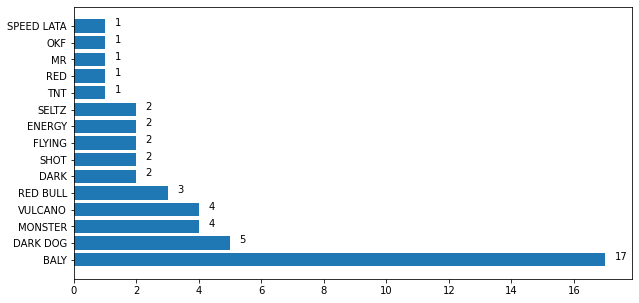

In [63]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.barh(y,x,align="center")
for i,v in enumerate(x):
    ax.text(v+.3,i,str(v))
plt.show()
fig.savefig('./Competencia_Energizante.png')

In [64]:
df["Precio"].mean()

12721.875

In [15]:
df.to_csv("./Competencia_Energizante.csv")